In [1]:
# Build a prediction model of your choice (regression or supervised learning) 
# to predict movie ratings (for all 400 movies) from gender identity, sibship status 
# and social viewing preferences (columns 475-477) only. 
# Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# 1. Load the data
df = pd.read_csv('movieReplicationSet.csv', sep=',')

ratings = df.iloc[:,:400]
gender_id = df.iloc[:,474:475]
sibship = df.iloc[:,475:476]
social_view = df.iloc[:,476:477]

In [3]:
# 2. Cleaning the data

# change all dataframes into numpy array
ratings = ratings.to_numpy()
pred_1 = gender_id.to_numpy().flatten()    # gender identity 
pred_2 = sibship.to_numpy().flatten()      # sibship status
pred_3 = social_view.to_numpy().flatten()  # social viewing preferences

# change 'no response' values in sibship and social_view into NaN values
pred_2 = pred_2.astype("float")
pred_3 = pred_3.astype("float")

for i in range(len(pred_2)):
    if pred_2[i] == -1:
        pred_2[i] = np.NaN
    
    if pred_3[i] == -1:
        pred_3[i] = np.NaN

# combine all predictor array 
predictors = np.empty([len(pred_1), 3])
predictors[:] = np.NaN

predictors[:,0] = pred_1
predictors[:,1] = pred_2
predictors[:,2] = pred_3

# Save the index for NaN values
dropnaIndex = np.argwhere(np.isnan(predictors).any(axis=1))
# Get rid NaN values for predictors, row-wise
predictors = predictors[~np.isnan(predictors).any(axis=1)]
predictors = predictors.astype('int')

predictors

array([[1, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 1]])

In [4]:
# Using the saved index, remove rows in the ratings array
y_ = np.delete(ratings, dropnaIndex,0)

# Replace NaN ratings with median for each movie ratings
y_median = np.nanmedian(y_, axis=0)

for i in range(400):
    y_[:,i] = np.nan_to_num(y_[:,i], nan=y_median[i])

In [5]:
# 3. EDA

# check the shape of ratings and predictors array
y_.shape, predictors.shape

((1064, 400), (1064, 3))

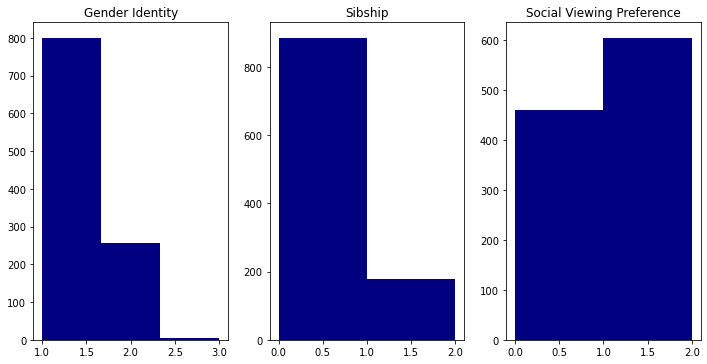

In [6]:
# plotting each predictors

fig,ax = plt.subplots(1,3,figsize=(10,5))
fig.tight_layout()

ax[0].hist(predictors[:,0], range=[1,3], bins=3, color='navy')
ax[0].set_title('Gender Identity')

ax[1].hist(predictors[:,1], range=[0,2], bins=2, color='navy')
ax[1].set_title('Sibship')

ax[2].hist(predictors[:,2], range=[0,2], bins=2, color='navy')
ax[2].set_title('Social Viewing Preference')

plt.show()

In [7]:
# how many participants? 

female_count = np.count_nonzero(predictors[:,0] == 1)
male_count = np.count_nonzero(predictors[:,0] == 2)
nonbinary_count = np.count_nonzero(predictors[:,0] == 3)

noSib_count = np.count_nonzero(predictors[:,1] == 0)
sib_count = np.count_nonzero(predictors[:,1] == 1)

alone_count = np.count_nonzero(predictors[:,2] == 0)
social_count = np.count_nonzero(predictors[:,2] == 1)

print('# of female participants: ' + str(female_count))
print('# of male participants: ' + str(male_count)) 
print('# of non-binary participants: ' + str(nonbinary_count))
print()
print('# of participants with no siblings: ' + str(noSib_count))
print('# of participants with siblings: ' + str(sib_count))
print()
print('# of participants who enjoy movie alone: ' + str(alone_count))
print('# of participants who enjoy movie together : ' + str(social_count))

# of female participants: 801
# of male participants: 257
# of non-binary participants: 6

# of participants with no siblings: 887
# of participants with siblings: 177

# of participants who enjoy movie alone: 459
# of participants who enjoy movie together : 605


In [8]:
# 4. Cross-validation: Split the dataset into training and test set. 
from sklearn.model_selection import train_test_split

def crossValidation(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)
    return X_train, X_test, y_train, y_test

In [9]:
# 5. Support Vector Machines
from sklearn import preprocessing

numMovies = 400
X = predictors
y = y_
accuracyScore_sum = 0

for i in range(numMovies):
    X_train, X_test, y_train, y_test = crossValidation(X,y[:,i])
    label_encoder = preprocessing.LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.fit_transform(y_test)
    clf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
    predictions = clf.predict(X_test) 
    modelAccuracy = accuracy_score(y_test,predictions)
    accuracyScore_sum = accuracyScore_sum + modelAccuracy
    print('Random forest model accuracy:', modelAccuracy)

Random forest model accuracy: 0.9460227272727273
Random forest model accuracy: 0.011363636363636364
Random forest model accuracy: 0.6960227272727273
Random forest model accuracy: 0.7784090909090909
Random forest model accuracy: 0.6789772727272727
Random forest model accuracy: 0.8806818181818182
Random forest model accuracy: 0.8465909090909091
Random forest model accuracy: 0.8011363636363636
Random forest model accuracy: 0.017045454545454544
Random forest model accuracy: 0.6022727272727273
Random forest model accuracy: 0.7159090909090909
Random forest model accuracy: 0.8948863636363636
Random forest model accuracy: 0.6846590909090909
Random forest model accuracy: 0.9232954545454546
Random forest model accuracy: 0.6022727272727273
Random forest model accuracy: 0.011363636363636364
Random forest model accuracy: 0.7272727272727273
Random forest model accuracy: 0.06818181818181818
Random forest model accuracy: 0.7215909090909091
Random forest model accuracy: 0.8409090909090909
Random forest

Random forest model accuracy: 0.3494318181818182
Random forest model accuracy: 0.7698863636363636
Random forest model accuracy: 0.017045454545454544
Random forest model accuracy: 0.6392045454545454
Random forest model accuracy: 0.036931818181818184
Random forest model accuracy: 0.7471590909090909
Random forest model accuracy: 0.6960227272727273
Random forest model accuracy: 0.8465909090909091
Random forest model accuracy: 0.028409090909090908
Random forest model accuracy: 0.9318181818181818
Random forest model accuracy: 0.7159090909090909
Random forest model accuracy: 0.06534090909090909
Random forest model accuracy: 0.7414772727272727
Random forest model accuracy: 0.5823863636363636
Random forest model accuracy: 0.019886363636363636
Random forest model accuracy: 0.4431818181818182
Random forest model accuracy: 0.9232954545454546
Random forest model accuracy: 0.4715909090909091
Random forest model accuracy: 0.9119318181818182
Random forest model accuracy: 0.7073863636363636
Random fore

Random forest model accuracy: 0.6960227272727273
Random forest model accuracy: 0.7528409090909091
Random forest model accuracy: 0.59375
Random forest model accuracy: 0.022727272727272728
Random forest model accuracy: 0.9460227272727273
Random forest model accuracy: 0.8352272727272727
Random forest model accuracy: 0.9232954545454546
Random forest model accuracy: 0.8778409090909091
Random forest model accuracy: 0.4119318181818182
Random forest model accuracy: 0.5085227272727273
Random forest model accuracy: 0.13352272727272727
Random forest model accuracy: 0.7926136363636364
Random forest model accuracy: 0.7386363636363636
Random forest model accuracy: 0.6420454545454546
Random forest model accuracy: 0.011363636363636364
Random forest model accuracy: 0.5113636363636364
Random forest model accuracy: 0.9289772727272727
Random forest model accuracy: 0.011363636363636364
Random forest model accuracy: 0.8295454545454546
Random forest model accuracy: 0.9204545454545454
Random forest model accu

In [10]:
accuracyScore_sum / numMovies

0.5778409090909092

In [224]:
# 6. Random Forest Model 

accuracyScore_sum2 = 0

for i in range(numMovies):
    X_train, X_test, y_train, y_test = crossValidation(X,y[:,i])
    label_encoder = preprocessing.LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.fit_transform(y_test)
    clf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
    predictions = clf.predict(X_test) 
    modelAccuracy = accuracy_score(y_test,predictions)
    accuracyScore_sum2 = accuracyScore_sum + modelAccuracy
    print('Random forest model accuracy:', modelAccuracy)

Random forest model accuracy: 0.9460227272727273
Random forest model accuracy: 0.011363636363636364
Random forest model accuracy: 0.6960227272727273
Random forest model accuracy: 0.7784090909090909
Random forest model accuracy: 0.6789772727272727
Random forest model accuracy: 0.8806818181818182
Random forest model accuracy: 0.8465909090909091
Random forest model accuracy: 0.8011363636363636
Random forest model accuracy: 0.017045454545454544
Random forest model accuracy: 0.6022727272727273
Random forest model accuracy: 0.7102272727272727
Random forest model accuracy: 0.8948863636363636
Random forest model accuracy: 0.6875
Random forest model accuracy: 0.9232954545454546
Random forest model accuracy: 0.5880681818181818
Random forest model accuracy: 0.011363636363636364
Random forest model accuracy: 0.7301136363636364
Random forest model accuracy: 0.06818181818181818
Random forest model accuracy: 0.7215909090909091
Random forest model accuracy: 0.8409090909090909
Random forest model accur

Random forest model accuracy: 0.3494318181818182
Random forest model accuracy: 0.7698863636363636
Random forest model accuracy: 0.017045454545454544
Random forest model accuracy: 0.6392045454545454
Random forest model accuracy: 0.036931818181818184
Random forest model accuracy: 0.7471590909090909
Random forest model accuracy: 0.6960227272727273
Random forest model accuracy: 0.8465909090909091
Random forest model accuracy: 0.028409090909090908
Random forest model accuracy: 0.9318181818181818
Random forest model accuracy: 0.7159090909090909
Random forest model accuracy: 0.06534090909090909
Random forest model accuracy: 0.7414772727272727
Random forest model accuracy: 0.5823863636363636
Random forest model accuracy: 0.019886363636363636
Random forest model accuracy: 0.4403409090909091
Random forest model accuracy: 0.9232954545454546
Random forest model accuracy: 0.4715909090909091
Random forest model accuracy: 0.9119318181818182
Random forest model accuracy: 0.7102272727272727
Random fore

Random forest model accuracy: 0.6960227272727273
Random forest model accuracy: 0.7528409090909091
Random forest model accuracy: 0.59375
Random forest model accuracy: 0.022727272727272728
Random forest model accuracy: 0.9460227272727273
Random forest model accuracy: 0.8352272727272727
Random forest model accuracy: 0.9232954545454546
Random forest model accuracy: 0.8778409090909091
Random forest model accuracy: 0.4119318181818182
Random forest model accuracy: 0.5085227272727273
Random forest model accuracy: 0.13352272727272727
Random forest model accuracy: 0.7926136363636364
Random forest model accuracy: 0.7386363636363636
Random forest model accuracy: 0.6420454545454546
Random forest model accuracy: 0.011363636363636364
Random forest model accuracy: 0.5113636363636364
Random forest model accuracy: 0.9289772727272727
Random forest model accuracy: 0.011363636363636364
Random forest model accuracy: 0.8295454545454546
Random forest model accuracy: 0.9204545454545454
Random forest model accu

In [232]:
for i in range(numMovies):
    X_train, X_test, y_train, y_test = crossValidation(X,y[:,i])
    label_encoder = preprocessing.LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.fit_transform(y_test)
    clf = svm.SVC(kernel='linear').fit(X_train,y_train)
    sV = clf.support_vectors_ # Retrieve the support vectors from the model
    predictions = clf.predict(X_test) # Decision reflects who the model thinks will be depressed
    modelAccuracy = accuracy_score(y_test,predictions)
    accuracyScore_sum = accuracyScore_sum + modelAccuracy
    print('SVM model accuracy:', modelAccuracy)

0.8977272727272727